# Fozziwig's automated software defect prediction system Analysis

### About the data

The data that you have been given contains the static code metrics for each of the functions which comprise a software system. This system was developed by Fozziwig's Software Developers several
years ago. 
As well as the metrics for each function, it has also been recorded whether or not a fault was experienced in each function. 

This data came from the software testers who examined the system before it was publicly released.

### Data contains
1) Training data set (trainingSet.csv) 

2) Testing data set(testingSet.csv)

Each data set contains 13 features (each one a software metric). Class labels are
shown in the last column of each file: a value of `+1' means `defective' (the software module contained
a defect (fault)) while a value of `-1' means `non-defective'. 

### Objective

Given Fozziwig's automated software defect prediction system data,determine whether the software system cost effective or not

# Task 1: Data pre-processing and data exploration

### a) Use Pandas to load both trainingSet.csv and testingSet.csv

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


   
trainingSet = pd.read_csv('./trainingSet.csv')
testingSet = pd.read_csv('./testingSet.csv')

In [137]:
trainingSet.head()

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,DEFECTIVE
0,0,1,0,0,1,1,1,7,12,19,7,4,9,1
1,2,1,0,0,1,1,1,6,8,8,6,4,10,-1
2,3,9,0,3,1,1,1,24,22,33,13,11,33,1
3,0,1,0,0,1,1,1,1,1,2,1,2,4,-1
4,0,1,0,0,1,1,1,7,10,15,8,8,12,-1


In [138]:
trainingSet.describe(include="all")

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,DEFECTIVE
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,3.997253,9.370879,0.189560,2.483516,5.170330,4.579670,2.667582,31.129121,40.870879,66.310440,18.928571,12.175824,40.892857,0.000000
std,5.409154,11.363386,0.723323,5.600300,5.657692,5.029579,3.270529,33.411819,43.968024,70.111676,15.715457,6.252437,41.713731,1.001376
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,-1.000000
25%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,8.000000,10.000000,18.000000,7.000000,8.000000,13.000000,-1.000000
50%,2.000000,5.000000,0.000000,0.000000,3.000000,3.000000,1.000000,19.000000,26.000000,40.000000,15.000000,11.000000,25.000000,0.000000
75%,5.000000,13.000000,0.000000,2.000000,7.000000,6.000000,3.000000,45.000000,56.000000,99.000000,25.000000,16.000000,56.000000,1.000000
max,35.000000,89.000000,6.000000,44.000000,45.000000,45.000000,22.000000,262.000000,285.000000,509.000000,84.000000,37.000000,288.000000,1.000000


In [139]:
#get a list of the features within the dataset
print(trainingSet.columns)

Index(['LOC_BLANK', 'BRANCH_COUNT', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS',
       'CYCLOMATIC_COMPLEXITY', 'DESIGN_COMPLEXITY', 'ESSENTIAL_COMPLEXITY',
       'LOC_EXECUTABLE', 'NUM_OPERANDS', 'NUM_OPERATORS',
       'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS', 'LOC_TOTAL',
       'DEFECTIVE'],
      dtype='object')


In [140]:
trainingSet.sample(5)

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,DEFECTIVE
28,0,5,0,0,3,2,1,1,4,11,3,9,3,-1
249,2,5,0,0,3,2,3,7,19,24,15,11,11,1
51,0,1,0,0,1,1,1,9,18,23,14,10,11,1
326,1,3,0,0,2,2,1,6,17,25,11,10,9,1
2,3,9,0,3,1,1,1,24,22,33,13,11,33,1


In [141]:
#check for any other unusable values
print(pd.isnull(trainingSet).sum())

LOC_BLANK                0
BRANCH_COUNT             0
LOC_CODE_AND_COMMENT     0
LOC_COMMENTS             0
CYCLOMATIC_COMPLEXITY    0
DESIGN_COMPLEXITY        0
ESSENTIAL_COMPLEXITY     0
LOC_EXECUTABLE           0
NUM_OPERANDS             0
NUM_OPERATORS            0
NUM_UNIQUE_OPERANDS      0
NUM_UNIQUE_OPERATORS     0
LOC_TOTAL                0
DEFECTIVE                0
dtype: int64


In [142]:
trainingSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 14 columns):
LOC_BLANK                364 non-null int64
BRANCH_COUNT             364 non-null int64
LOC_CODE_AND_COMMENT     364 non-null int64
LOC_COMMENTS             364 non-null int64
CYCLOMATIC_COMPLEXITY    364 non-null int64
DESIGN_COMPLEXITY        364 non-null int64
ESSENTIAL_COMPLEXITY     364 non-null int64
LOC_EXECUTABLE           364 non-null int64
NUM_OPERANDS             364 non-null int64
NUM_OPERATORS            364 non-null int64
NUM_UNIQUE_OPERANDS      364 non-null int64
NUM_UNIQUE_OPERATORS     364 non-null int64
LOC_TOTAL                364 non-null int64
DEFECTIVE                364 non-null int64
dtypes: int64(14)
memory usage: 39.9 KB


### b) Find the number of patterns in each class for both loaded data sets using Python

In [143]:
trainingSet.DEFECTIVE.unique()

array([ 1, -1], dtype=int64)

In [144]:
trainingSet.DEFECTIVE.value_counts()

 1    182
-1    182
Name: DEFECTIVE, dtype: int64

### c) Choose an attribute and generate a boxplot for the two classes in the training set

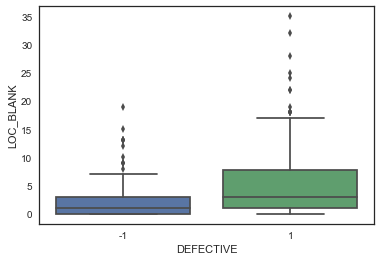

In [145]:
ax = sns.boxplot(x="DEFECTIVE", y="LOC_BLANK", data=trainingSet)

### d) Show one scatter plot, that is, one feature against another feature. It is your choice to show which two features you want to use. You need to use the training set

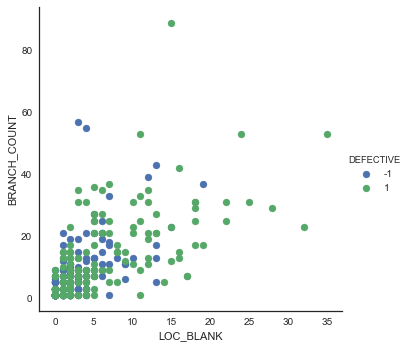

In [146]:
sns.FacetGrid(trainingSet, hue="DEFECTIVE", size=5) \
   .map(plt.scatter, "LOC_BLANK", "BRANCH_COUNT") \
   .add_legend()

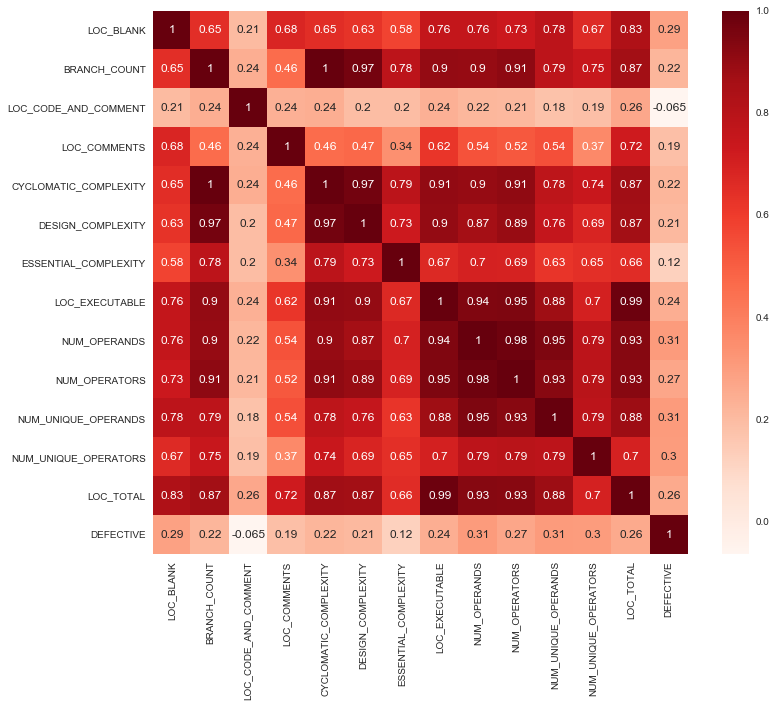

In [147]:

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = trainingSet.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [148]:
#Correlation with output variable
cor_target = abs(cor["DEFECTIVE"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

DEFECTIVE    1.0
Name: DEFECTIVE, dtype: float64

### e) Divide the original training set into a smaller training set (II) and a validation set. In this task, you need to use 55% of total training data points as the validation set

In [149]:
from sklearn.model_selection import train_test_split

y = trainingSet.DEFECTIVE # define the target variable (dependent variable) as y
X_train, X_valid, y_train, y_valid = train_test_split(trainingSet, y, test_size=0.55, random_state=0)

In [150]:
X_train.shape

(163, 14)

In [151]:
X_valid.shape

(201, 14)

# Task 2: Do a principal component analysis 

### a) Perform a PCA analysis on the original training data set.

PCA is effected by scale so we need to scale the features in our data before applying PCA. 

Using StandardScaler to help us standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_x = trainingSet.drop(columns=['DEFECTIVE'],axis=1)

# Fit on training set only.
scaler.fit(train_x)
# Apply transform to both the training set
train_x = scaler.transform(train_x)

#PCA Execution
pca = PCA(n_components=2)
pct = pca.fit_transform(train_x)
principal_trainingSet = pd.DataFrame(pct,columns=['PC1','PC2'])
finaltrainingSet= pd.concat([principal_trainingSet,trainingSet[['DEFECTIVE']]],axis=1)
finaltrainingSet.head()


C:\Users\naveen\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


,PC1,PC2,DEFECTIVE
0,-2.545231,0.023622,1
1,-2.546383,0.138904,-1
2,-1.197935,0.250131,1
3,-2.989879,0.083059,-1
4,-2.368161,-0.050425,-1


### b) Plot a scree plot to report variances captured by each principal component

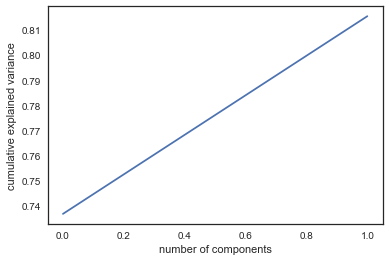

In [153]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


### c) Project the test set on the same PCA space produced by the original training dataset

In [154]:
#PCA Execution FOR testing set

test_y = testingSet.drop(columns=['DEFECTIVE'],axis=1)

# Fit on test set only.
scaler.fit(test_y)
# Apply transform to both the test set

test_y = scaler.transform(test_y)
pca = PCA(n_components=2)
pct_testingSet = pca.fit_transform(test_y)
principal_testingSet = pd.DataFrame(pct_testingSet,columns=['PC1_TESTING_SET','PC2_TESTING_SET'])
finaltestingSet= pd.concat([principal_testingSet,testingSet[['DEFECTIVE']]],axis=1)
finaltestingSet.head()

C:\Users\naveen\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


,PC1_TESTING_SET,PC2_TESTING_SET,DEFECTIVE
0,-0.662851,-0.130436,1
1,-1.996955,0.011570,-1
2,-0.346776,-0.286231,1
3,-2.612967,0.056211,-1
4,-2.392150,-0.007712,-1


### d) Plot two subplots in one figure: one for the training data in the PC1 and PC2 projection space and label the data in the picture according to its class; the other one for the test data in the same PCA space and label the data in the picture according to its class

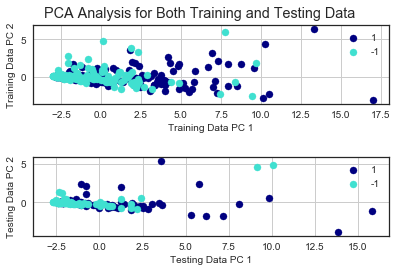

In [155]:
fig, axs = plt.subplots(2)
fig.suptitle('PCA Analysis for Both Training and Testing Data')
axs[0].set_xlabel('Training Data PC 1', fontsize = 10)
axs[0].set_ylabel('Training Data PC 2', fontsize = 10)
targets = [1,-1]
colors = ['navy', 'turquoise']
for target, color in zip(targets,colors):
    indicesToKeep = finaltrainingSet['DEFECTIVE'] == target
    axs[0].scatter(finaltrainingSet.loc[indicesToKeep, 'PC1']
               , finaltrainingSet.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
axs[0].legend(targets)
axs[0].grid()

axs[1].set_xlabel('Testing Data PC 1', fontsize = 10)
axs[1].set_ylabel('Testing Data PC 2', fontsize = 10)
targets = [1,-1]
colors = ['navy', 'turquoise']
for target, color in zip(targets,colors):
    indicesToKeep_testing = finaltestingSet['DEFECTIVE'] == target
    axs[1].scatter(finaltestingSet.loc[indicesToKeep_testing, 'PC1_TESTING_SET']
               , finaltestingSet.loc[indicesToKeep_testing, 'PC2_TESTING_SET']
               , c = color
               , s = 50)
axs[1].legend(targets)
axs[1].grid()
fig.tight_layout(pad=2.0)

# Task 3: Do a classification using the Naïve Bayes Classification model

Train the model using the original training set and report the performance on the test set including
accuracy rate. 

In [156]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


train_x = train_x
train_y = trainingSet['DEFECTIVE']

# seperate the independent and target variable on testing data
test_x = test_y
test_y = testingSet['DEFECTIVE']

'''
Create the object of the Naive Bayes model
You can also add other parameters and test your code here
Some parameters are : var_smoothing
Documentation of sklearn GaussianNB: 

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

 '''
model = GaussianNB()

# fit the model with the training data
model.fit(train_x,train_y)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Target on train data [-1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1
  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1
  1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1
 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1
 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1
 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1 -1 -1 -1  1  1
  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
  1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1

In [157]:
X_valid.DEFECTIVE.value_counts()

-1    103
 1     98
Name: DEFECTIVE, dtype: int64

# Task 4: Investigate how the number of features in the training dataset affects the model performance on the validation set (16 marks)

### a) Use the training set (II) to train 13 Naïve Bayes Classification models, with 13 different feature sets. That is: the first one is to use the 1st feature only; the second one is to use the 1st and the 2 nd features; the third one is to use the 1st, 2nd, and 3rd features, the fourth one is to use the first 4 features, and so on.

In [158]:
# train_x.columns.size

# train_x[train_x.columns[0]]
y_train = y_train
y_valid = y_valid
X_train = X_train.drop(columns=['DEFECTIVE'],axis=1)
X_valid = X_valid.drop(columns=['DEFECTIVE'],axis=1)
column_size = X_train.columns.size
accuracy_tr=[]
accuracy_te=[]

for x in range(column_size):
    X_train_0 = X_train.loc[:,:X_train.columns[x]]
    X_valid_0 = X_valid.loc[:,:X_valid.columns[x]]
    
    model = GaussianNB()

    # fit the model with the training data(II)
    model.fit(X_train_0,y_train)

    # predict the target on the train dataset(II)
    predict_train = model.predict(X_train_0)
    print('Target on train data',predict_train) 

    # Accuray Score on train dataset(II)
    accuracy_train = accuracy_score(y_train,predict_train)
    accuracy_tr.append(accuracy_train)
    print('accuracy_score on train dataset with no features : ', accuracy_train)

    # predict the target on the validation dataset
    predict_test = model.predict(X_valid_0)
    print('Target on test data',predict_test) 

    # Accuracy Score on validation dataset
    accuracy_test = accuracy_score(y_valid,predict_test)
    accuracy_te.append(accuracy_test)
    print('accuracy_score on test dataset : ', accuracy_test)



Target on train data [-1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1
 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1 -1
 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1]
accuracy_score on train dataset with no features :  0.5950920245398773
Target on test data [-1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1
  1  1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -

In [159]:
accuracy_tr

[0.5950920245398773,
 0.6196319018404908,
 0.588957055214724,
 0.5950920245398773,
 0.6012269938650306,
 0.5950920245398773,
 0.588957055214724,
 0.588957055214724,
 0.6073619631901841,
 0.6073619631901841,
 0.6073619631901841,
 0.6073619631901841,
 0.6073619631901841]

In [160]:
count = []
for x in range(column_size):
    count.append(x)

#### Measure the accuracy rate on both the training set and the validation set. Report the results byplotting them in a figure: that is, a plot of the accuracy rate against the number of features used in each model. There should be two curves in this figure: one for the training set (II); the other one for the validation set

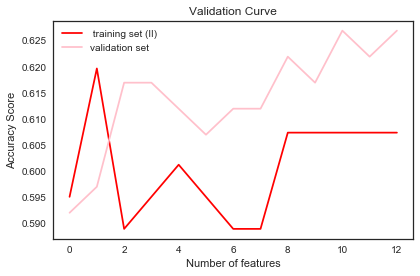

In [161]:

# Plot accurancy bands for training and validation sets
plt.plot(count, accuracy_tr, color="red",label=" training set (II)")
plt.plot(count, accuracy_te, color="pink",label="validation set")

# Create plot
plt.title("Validation Curve")
plt.xlabel("Number of features")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

#### b) Report what is the best number of features you would like to use in this work and explain why you choose it. Write it down in your Jupyter notebook

As per corelation with heat map no features are corelated with target variable defective.Best no of features i would like to use in this work is all 13 features because there is no corelation with another feature.

#### c) Use the selected number of features to train the model and report the performance on the test set

In [100]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


train_x = trainingSet
train_y = trainingSet['DEFECTIVE']

# seperate the independent and target variable on testing data
test_x = testingSet
test_y = testingSet['DEFECTIVE']

'''
Create the object of the Naive Bayes model
You can also add other parameters and test your code here
Some parameters are : var_smoothing
Documentation of sklearn GaussianNB: 

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

 '''
model = GaussianNB()

# fit the model with the training data
model.fit(train_x,train_y)

# predict the target on the train dataset
predict_train = model.predict(train_x)
# print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(test_x)
# print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on train dataset :  1.0
accuracy_score on test dataset :  1.0


# Task 5: Summarize your findings, write your conclusions using critical thinking (no more than 100words) and write it down in your Jupyter notebook (4 marks). 

Feature selection is not linearly working on the validation set.With over all observation of feature selection and applying model is leading to over fit the model.That means model got over-fitting. In the given data there is no noise data or missing values.All the features given in the data set are not correlated with target variable.Principle component analysis gives better accuracy rate rather than feature comparison check.
With the given features prediction data, we can suggest that building such system is cost effective only.